In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_tfidf_vectorized.csv')

In [3]:
data.head()

,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0.0,0.0,0.0,0.000000,0.023901,0.0,0.0,0.000000,0.046312,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Positive,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Negative,0.0,0.0,0.0,0.015669,0.000000,0.0,0.0,0.027076,0.191413,...,0.0,0.0,0.026004,0.0,0.0,0.121938,0.0,0.0,0.0,0.0


In [4]:
X = data.drop(columns=['Label'])
y = data['Label'] 

In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Positive = 1, Negative = 0
class_names = label_encoder.classes_  # To use in confusion matrix display

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

In [7]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6088 - loss: 0.6883 - val_accuracy: 0.5676 - val_loss: 0.6815
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7790 - loss: 0.6289 - val_accuracy: 0.6486 - val_loss: 0.6510
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8503 - loss: 0.4637 - val_accuracy: 0.6486 - val_loss: 0.6596
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9189 - loss: 0.2941 - val_accuracy: 0.6757 - val_loss: 0.7225
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.1363 - val_accuracy: 0.6892 - val_loss: 0.7889
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0648 - val_accuracy: 0.6757 - val_loss: 0.9027
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0313 - val_accuracy: 0.7027 - val_loss: 0.9734
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0218 - val_accuracy: 0.7027 - val_loss:

In [9]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.7445652173913043

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.82      0.77        98
    Positive       0.76      0.66      0.71        86

    accuracy                           0.74       184
   macro avg       0.75      0.74      0.74       184
weighted avg       0.75      0.74      0.74       184



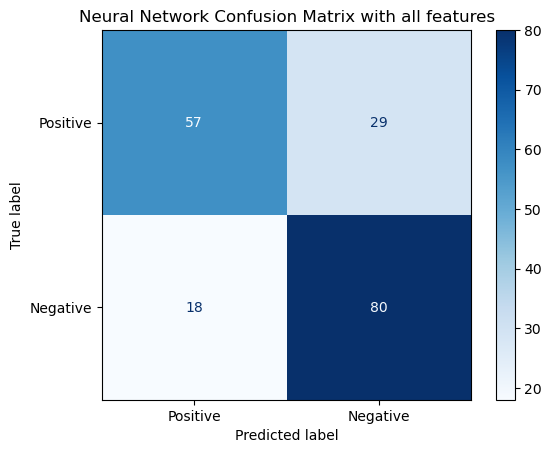

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1: Positive, 0: Negative
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Neural Network Confusion Matrix with all features")
plt.show()